# <font color='red'> TP4 Algorithmique Numérique pour l’Optimisation  </font>

In [141]:
import autograd as ag
import autograd.numpy as np
import matplotlib.pyplot as plt


## <font color='red'> 1 Optimisation sous contrainte  </font>

f(a,b) = ${a^3 +2a^2 −2ab+b^2 +ab^3 −2b+5}$
L'objectif est de minimiser f sous la contrainte: 

${a^2+b^2 ≤ 12}$



### <font color='red'>  1.1 Résolution graphique </font>




### Question 1

Le minimum local ne satisfait pas la contrainte car : 0.2255*0.2255 + 0.9312*0.9312 = 0.91 > 0.5 

À l'optimum la contrainte sera-t-elle active?

la contrainte est active c'est que la miminum local verifie que c(x)=0 graphiquement on le retrouve sur le cercle de la contrainte donc on peut tansformer la contrainte d'inégalité en une égalité 

### Question 3:


In [ ]:
def f (a,b):
    return a**3 + 2*a**2 - 2*a*b + b**2 + a*b**3 - 2*b + 5

def nabla_f (a,b) :
    return np.array ([b**3 + 3*a**2 + 4*a - 2*b, 
                      3*a*b**2 - 2*a + 2*b - 2], dtype=np.float64)
def contrainte(a,b):
    return a**2+b**2-(1/2)**2


def nabla_contrainte(a,b):
    return  np.array ([2*a,2*b],dtype=np.float64)

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


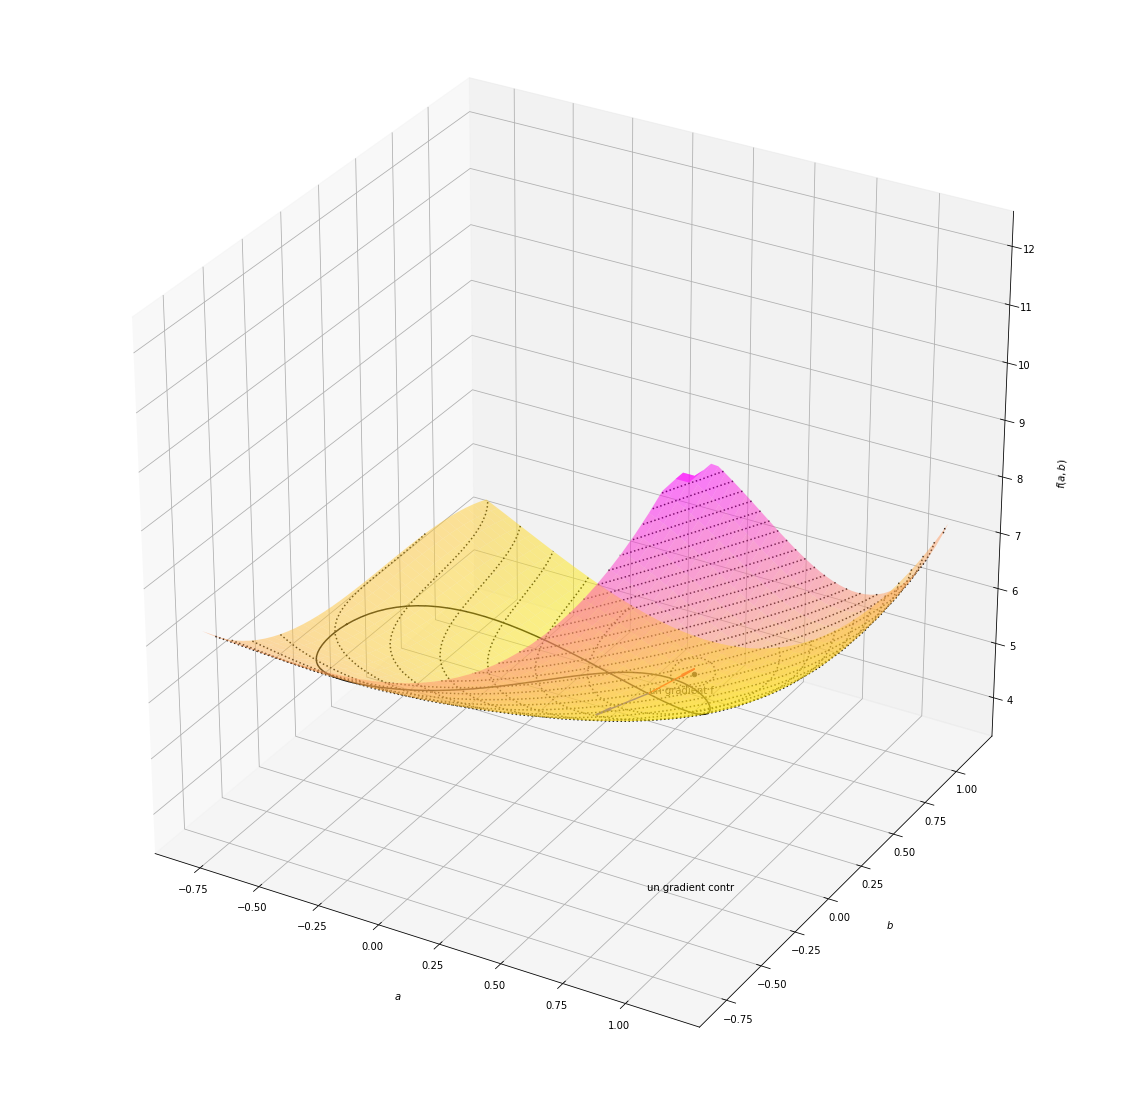

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')

ax.set_xlabel('$a$', labelpad=20)
ax.set_ylabel('$b$', labelpad=20)
ax.set_zlabel('$f(a,b)$', labelpad=20)

xplot = np.arange (-.8, 1.2, 0.05)
yplot = np.arange (-.8, 1.2, 0.05)

# Tracé du graphe de f
X, Y = np.meshgrid (xplot, yplot)
Z = f(X,Y)

m, n = Z.shape
for i in range (m) :
    for j in range (n) :
        Z[i,j] = max(min(Z[i,j], 12), 3)

ax.plot_surface(X, Y, Z, cmap="spring_r", lw=0.5, rstride=1, cstride=1, alpha=0.5)
ax.contour(X, Y, Z, 30, colors="k", linestyles="dotted")

# Le minimim local de f sans tenir compte de la contrainte
zero = np.array ([0.2255014396, 0.9318083312])
ax.scatter ([zero[0]], [zero[1]], [f(zero[0],zero[1])], color='black')

# Tracé de la contrainte a**2 + b**2 = r**2 (avec r**2 = 1/2)

r = 1/np.sqrt(2)
n = 100
angles = np.linspace (-np.pi, np.pi, n)
cxplot = np.array ([r * np.cos(theta) for theta in angles])
cyplot = np.array ([r * np.sin(theta) for theta in angles])
czplot = np.array ([f (cxplot[i], cyplot[i]) for i in range (0,n)])
ax.plot (cxplot, cyplot, czplot, color='black')

# Tracé d'un gradient (longueur normalisée)

a, b = 0.17, 0.69
grad_f = nabla_f (a, b)
grad_f = (.25/np.linalg.norm(grad_f,2)) * grad_f
grad_contrainte = nabla_contrainte(a,b)
grad_contrainte = (.25/np.linalg.norm(grad_contrainte,2)) * grad_contrainte
ax.quiver (a, b, f(a,b), grad_f[0], grad_f[1], 0, color='blue')
ax.text (a, b, f(a,b), 'un gradient f')
ax.quiver (a, b, f(a,b), grad_contrainte[0], grad_contrainte[1], 0, color='red')
ax.text (a, b, contrainte(a,b), 'un gradient contr')
plt.show ()

## <font color='red'>  1.2 Calcul du minimum <color>

On sait que pour résoudre le problème d'optimisation sous contriantes on cherche les points stationnaires du lagrangien

### Question 4 : 


Le lagrangien de ce problème s'écrit comme ceci: 

L(x,lambda) = f(x)-C(x) 

Les variables du lagrangien sont donc x et lambda

### Question 5

In [ ]:
def langrangien(u):
  """
  La fonction qui permet de calculer le lagrangien du problème 
  les paramètres: 
    u : un vecteur contenant x et lambda qui sont les variables du lagrangien
  """
  # récuper les valeurs de a, b, etlambda de u
  a,b, lmbda= u[0]  ,u[1],u[2]
  return f(a,b)-lmbda*contrainte(a,b)


### Question 6

In [ ]:
nabla_Lagrangien = ag.grad(langrangien)
H_Lagrangien =  ag.hessian(langrangien)

### Question 07

In [ ]:
a,b, lmbda = 0.23,0.8,0
u= np.array([a,b,lmbda], dtype= np.float64)

# résoudre le problème en utilisant l'algorithme de neuton
def newton(u, nb_iteration): 
    res  = []
    for i in range(nb_iteration): 
        res.append(u)
        H= H_Lagrangien(u)
        w= nabla_Lagrangien(u)
        h = np.linalg.solve(-H, w)
        u = u+ h 
    return res

solution_optimale = newton(u,100)[-1]
print(solution_optimale)

[ 0.12495739  0.48413392 -1.23290503]


On voit que l'algorithme de newthon converge vers une solution optimale.

On vérifie que la contrainte s'annule dans cette solution optimal et que les vecteurs grandient de l'objectif et de la contrainte en ce point son parallèle 

In [ ]:
print(contrainte(solution_optimale[0],solution_optimale[1]))
print(nabla_f (solution_optimale[0],solution_optimale[1]))
print(nabla_contrainte(solution_optimale[0],solution_optimale[1]))
   

0.0
[-0.30812119 -1.19378229]
[0.24991478 0.96826784]


## <font color='red'> 2 Estimation de paramètres pour la fonction logistique <color>

### <font color='red'>  2.1 Estimation par moindres carrés linéaires <color>

In [ ]:
Tx = np.array([x for x in range(10)],dtype= np.float64)
Ty = np.array([.53 ,.53 ,1.53, 2.53, 12.53, 21.53, 24.53, 28.53, 28.53, 30.53],dtype= np.float64)

In [ ]:
keppa, alpha, rho = 30.54, 5.163, 1.188
u = np.array([keppa, alpha, rho],dtype= np.float64)

In [ ]:
def modele(x,u):
  kappa = u[0]
  alpha= u[1]
  rho =u[2]
  return kappa/(1+np.exp(alpha-rho*x))

L'affichage graphique de l'estimateur logit:

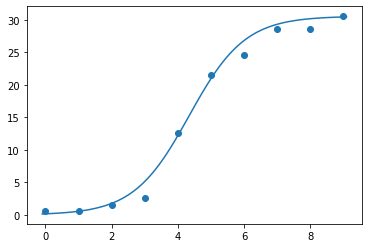

In [ ]:
xplot = np.linspace(Tx[0]-.1, Tx[-1]+.1,100)
yplot = np.array([modele(x,u) for x in xplot])

plt.plot(xplot,yplot)
plt.scatter(Tx,Ty)
plt.show()

### <font color='red'> 2.2 Estimation par moindres carrés non linéaires <color>

### Question 9

#### 1 Avec newton sans controle de pas:

In [ ]:
keppa, alpha, rho = 30.54, 5.163, 1.188
u0 = np.array([keppa, alpha, rho],dtype= np.float64)

In [ ]:
def lost(Y, Y_pred): 
  """
  calcul le cout de se tromper sur toutes les lignes du dataset. 
  Les paramètres: 
  Y: un array contenant les vrais y qu'on cherche à approcher
  Y_pred : un array contenant les y prédits par notre modèle avec certain paramètres
  """
  return np.sum((Y - Y_pred)**2)

In [122]:
def nweton_fit(x,y,u,epsilon, max_iter=100):
    """
    la fonction qui estime les parameters K, alpha, et rho de notre modele avec la méthode Newton-Raphson.
    
    Las paramètres:
    - x: un array contenant les données
    - y: un array: les vraies y qu'on cherche à estimer 
    - u: le vecteur des paramètres
    - epsilon: pour tester la  convergence
    - max_iter: le nombre maximum d'itération
    
    Returns:
    - u: les paramètres optimaux
    
    """
    K, alpha, rho = u[0],u[1], u[2]

    for i in range(max_iter): # on itère max_iter fois 

        # calculer la prédiction
        y_pred = modele(x,u)
        
        # calculer la fonction de loss sur toutes les données
        sse = lost(y, y_pred)

        # calculer le  gradient de la fonction de loss par apport à tous les paramètre du modèle
        gradient_K = 2 * np.sum((y - y_pred) * (-y_pred / K))
        gradient_alpha = 2 * np.sum((y - y_pred) * y_pred * np.exp(-alpha + rho*x))
        gradient_rho = 2 * np.sum((y - y_pred) * y_pred * x * np.exp(-alpha + rho*x))
        
        # calculer la matrice hessiène de la fonction de loss: 
        Hessian_KK = 2 * np.sum((y_pred / K)**2)
        Hessian_Kalpha = 2 * np.sum((y_pred / K) * y_pred * np.exp(-alpha + rho*x))
        Hessian_Krho = 2 * np.sum((y_pred / K) * y_pred * x * np.exp(-alpha + rho*x))
        Hessian_alphalpha = 2 * np.sum(y_pred**2 * np.exp(-2*alpha + 2*rho*x))
        Hessian_alpharho = 2 * np.sum(y_pred**2 * x * np.exp(-2*alpha + 2*rho*x))
        Hessian_rhorho = 2 * np.sum(y_pred**2 * x**2 * np.exp(-2*alpha + 2*rho*x))
        
        #calculer le coefficient de newton pour la mise à jour: 
        delta_K = -gradient_K / Hessian_KK
        delta_alpha = -gradient_alpha / Hessian_alphalpha
        delta_rho = -gradient_rho / Hessian_rhorho

        # la mise à jour des paramètres: 
        K += delta_K
        alpha += delta_alpha
        rho += delta_rho

        #tester la convergence de l'algorithme
        if np.abs(delta_K) < epsilon or np.abs(delta_alpha) < epsilon or np.abs(delta_rho) < epsilon:
          break

    return np.array([K, alpha, rho], dtype=np.float64)

In [123]:
u_optimal_newton = nweton_fit(Tx,Ty,u0, 1e-2,100)

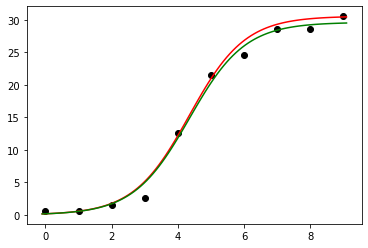

In [124]:
xplot = np.linspace(Tx[0]-.1, Tx[-1]+.1,100)
yplot = np.array([modele(x,u) for x in xplot])
y_optimal_plot = np.array([modele(x,u_optimal_newton) for x in xplot])

plt.plot(xplot,yplot, color="red")
plt.plot(xplot,y_optimal_plot, color="green")
plt.scatter(Tx,Ty, color="black")
plt.show()

## 2 avec l'algorithme de gradient

In [132]:
def gradient_fit(x, y, u, learning_rate, epsilon, max_iter):
    """
    la fonction qui estime les parameters K, alpha, et rho de notre modele avec la méthode la descente de gradient
    Las paramètres:
    - x: un array contenant les données
    - y: un array: les vraies y qu'on cherche à estimer 
    - u: le vecteur des paramètres
    - epsilon: pour tester la  convergence
    - max_iter: le nombre maximum d'itération
    
    Returns:
    - u: les paramètres optimaux
    
    """
    K, alpha, rho = u[0],u[1], u[2]

    for i in range(max_iter):
        # calculer la prédiction
        y_pred = modele(x,u)

        # calculer le gradient de la fonction de loss 
        gradient_K = 2 * np.sum((y - y_pred) * (-y_pred / K))
        gradient_alpha = 2 * np.sum((y - y_pred) * y_pred * np.exp(-alpha + rho*x))
        gradient_rho = 2 * np.sum((y - y_pred) * y_pred * x * np.exp(-alpha + rho*x))
        

        # mise à jour des paramètres
        K -= learning_rate * gradient_K
        alpha -= learning_rate * gradient_alpha
        rho -= learning_rate * gradient_rho

        # vérifier la convergence: 
        if np.abs(gradient_K) < epsilon and np.abs(gradient_alpha) < epsilon and np.abs(gradient_rho) < epsilon:
            break

        return np.array([K, alpha, rho], dtype=np.float64)


In [133]:
u_optimal_gradient_descente= gradient_fit(Tx,Ty,u0,0.001,1e-2,100)

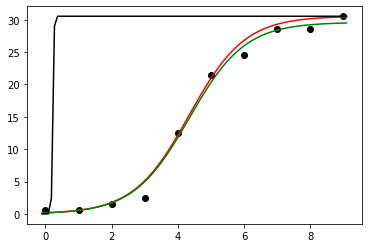

In [134]:
xplot = np.linspace(Tx[0]-.1, Tx[-1]+.1,100)
yplot = np.array([modele(x,u) for x in xplot])
y_optimal_plot_newton = np.array([modele(x,u_optimal_newton) for x in xplot])
y_optimal_plot_gradient_descente = np.array([modele(x,u_optimal_gradient_descente) for x in xplot])

plt.plot(xplot,yplot, color="red")
plt.plot(xplot,y_optimal_plot_newton, color="green")
plt.plot(xplot,y_optimal_plot_gradient_descente, color="black")
plt.scatter(Tx,Ty, color="black")
plt.show()


## 3 Placement de cercles

In [197]:
def decompose (u) :
    """
    le fonction qui décopose les vecteur u et v
    les paramètres:   
      u : deux  vecteur contenant le rayon et les cordonnées d'un cercle
    """
    return u[0], u[1], u[2]

### Question 10

In [248]:
def trace_cercle(u): 
    """
    permer de dessiner le cercle de rayon u et de centre v
    """

    r, xc, yc = decompose (u)
    circle = plt.Circle((xc, yc), r, color='b', fill=True)
    fig, ax = plt.subplots()
    ax.add_artist(circle)
    plt.show()
    


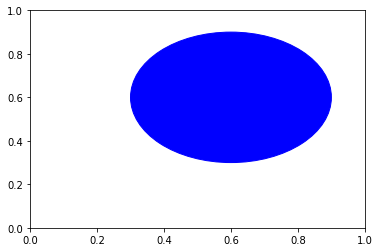

In [249]:
trace_cercle(np.array([0.3,0.6, 0.6]))

### Question 11

In [200]:
Tx = np.array ([11,12,8,7,3], dtype=np.float64)
Ty = np.array ([4,8,13,12,7], dtype=np.float64)

In [201]:
def f(u, Tx ,Ty): 
  """
  calculer la somme des carrés des distances entre le cercle et chacun des points expérimentaux dans Tx,Ty 
  Les paramètres: 
    u, v: les cordonnées du cercle
    Tx, Ty: abscisses et les ordonnées de points expérimentaux
  """
  r, xc, yc = decompose(u)

  return np.sum((np.sqrt((Tx - xc)**2 + (Ty-yc)**2) - r)**2)


### Question 12

In [202]:
nabla_f = ag.grad(f)
H_f = ag.hessian(f)

### Question 13

In [204]:
def backtrack_line_search(u, Tx, Ty,alpha0, h, g):
  """
  calcul la valeur alpha qui permette de contrôler le pas de l’algorithme de Newton et/ou celui du gradient.
  """
  rho = .5
  c = .5
  alpha = alpha0
  r,xc,yc = decompose(u,v)
  D_h = np.dot (nabla_f (u,Tx, Ty), h) 
  while f(u + alpha*h,Tx, Ty) > f(u,Tx,Ty) + c * alpha * D_h :
        alpha *= rho
  return alpha


### Question 14

Avec newton:

In [205]:
def newton_avec_control(u,Tx,Ty):
  for i in range (6) :
    z = f(u,Tx,Ty)
    H_f_un = H_f(u,Tx,Ty)
    nabla_f_un = nabla_f (u,Tx,Ty)
    h = np.linalg.solve (- H_f_un, nabla_f_un)
    alpha = backtrack_line_search (u,Tx,Ty, 1.,h,nabla_f_un)
    #print ('u[%d] =' % i, un, 'f(u[%d]) =' % i, z, 'alpha =', alpha)
    u = u + alpha*h
